In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
import scipy
from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML

plt.style.use('seaborn')
%matplotlib inline 
sb.set_style('darkgrid')

In [338]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    # return pd.to_datetime(input_, format='%m/%d/%y', errors='ignore')
    return pd.to_datetime(input_, format='%m/%d/%y')


def set_date_formatting(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=90)

# read data from web
#
def fetch_data(names = ['confirmed_global', 'deaths_global', 'recovered_global']):
    """Return 4 data frames:
    [confirmed, deaths, recovered], location_info
    
    where confirmed, deaths and recovered are data frames with countries/regions in the rows, and 
    days in the columns
    
    and location_info provides additional information about the locations.
    
    We assume all three tables have the same entries"""
    location_info = pd.DataFrame()
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_covid19_" + name + ".csv")
        df = pd.read_csv(url, index_col=1)
    
        
        df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        #df = df.drop(labels=["Lat", "Long"], axis=1)
        
        # extract dates from strings
        dates = string_to_date(df.columns[1:])        
        # use those objects as new column labels
        df.columns = [df.columns[0]] + list(dates)
        print(f"{name:10}: last data point from {max(dates[1:])}")
        # dfs.append([df, location_info)
        dfs.append(df)

    return dfs

In [339]:
confirmed, deaths, recovered = fetch_data()

confirmed_df = confirmed.groupby(confirmed.index).sum()
deaths_df = deaths.groupby(deaths.index).sum()
recoveries_df = recovered.groupby(recovered.index).sum()

confirmed_global: last data point from 2020-03-27 00:00:00
deaths_global: last data point from 2020-03-27 00:00:00
recovered_global: last data point from 2020-03-27 00:00:00


In [327]:
#confirmed_df

In [343]:
#confirmed_df.head()
columns = confirmed_df.keys()
confirmed = confirmed_df.loc[:, columns[2]:columns[-1]]
deaths = deaths_df.loc[:, columns[2]:columns[-1]]
recoveries = recoveries_df.loc[:, columns[2]:columns[-1]]
active = confirmed_df - deaths_df - recoveries_df
active = active.fillna(0)
active.drop(active.columns[[0,-1]], axis = 1, inplace = True) 

In [319]:
dates = confirmed.keys()
#world_cases = []
#total_deaths = [] 
#mortality_rate = []
#total_recovered = [] 
#total_active = []

#for i in dates:
    #confirmed_sum = confirmed[i].sum()
    #death_sum = deaths[i].sum()
    #recovered_sum = recoveries[i].sum()
    #total_active_sum = active[i].sum() ###new
    #world_cases.append(confirmed_sum)
    #total_deaths.append(death_sum)
    #mortality_rate.append(death_sum/confirmed_sum)
    #total_recovered.append(recovered_sum)
    #total_active.append(total_active_sum)
#total_deaths = deaths.sum()
#world_cases = confirmed.sum()
#total_recovered = recoveries.sum()
#total_active = active.sum()

total_deaths = deaths.iloc[:,-1]
world_cases = confirmed.iloc[:,-1]
total_recovered = recoveries.iloc[:,-1]
total_active = active.iloc[:,-1]


In [16]:
world_cases.sort_values(ascending=False)

In [321]:
index = pd.DataFrame(confirmed.index)
index.set_index('Country/Region',inplace=True)
world_cases = pd.DataFrame(world_cases)
total_deaths = pd.DataFrame(total_deaths)
total_recovered = pd.DataFrame(total_recovered)
total_active = pd.DataFrame(total_active)

In [322]:
#print(index.size,world_cases.size,total_deaths.size,total_recovered.size,total_active.size)
global_data = pd.concat([index,world_cases,total_deaths,total_recovered,total_active],axis=1)
global_data.columns = ['world_cases','total_deaths','total_recovered','total_active']

In [324]:
global_data.sort_values(by='world_cases',ascending=False,inplace=True)

In [15]:
#global_data

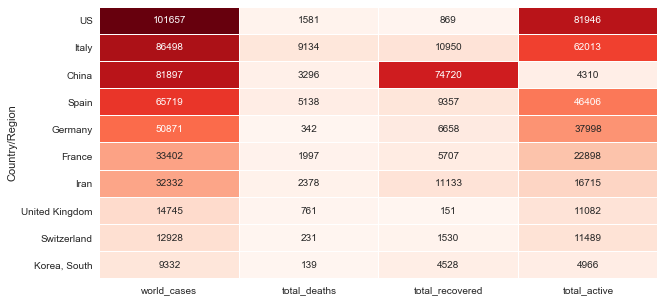

In [333]:
plt.figure(figsize=(10,5))
ax = sb.heatmap(global_data[:10], annot=True, fmt="d", linewidths=0.1, cmap='Reds', linecolor='white', cbar=False)

In [3]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df1 = pd.read_csv(url, index_col=1)
df1 = df1.drop(labels=["Province/State"], axis=1)
df1 = df1.groupby(df1.index).sum()

In [7]:
formated_gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], animation_frame="Date", 
                     title='Spread over time')
fig.update(layout_coloraxis_showscale=False)
fig.show()


In [13]:
df1.to_csv('out1.csv',index=True)

In [14]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1710772"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')